In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import importlib
homomul = importlib.import_module("homophily_multiple_attributes")
homomul_viz = importlib.import_module("homophily_multi_attr_viz")

## Model inputs

### Number of nodes

In [7]:
N = 1000

### Population distribution

In [8]:
## Population fractions

correl_param = 0.4 ## Between 0 and 1
pop_fracs_lst = [[0.1,0.9],[0.5,0.5]] ## Marginal population distributions

## Joint population distribution. It's a tensor T where each element T[i1,i2,i3,...,iD] corresponds to the population fraction
## of the group (i1,i2,i3,...,iD). D is the total number of dimensions.
comp_pop_frac_tnsr = homomul.consol_comp_pop_frac_tnsr(pop_fracs_lst,correl_param) 
pprint(comp_pop_frac_tnsr)

array([[0.04, 0.06],
       [0.46, 0.44]])


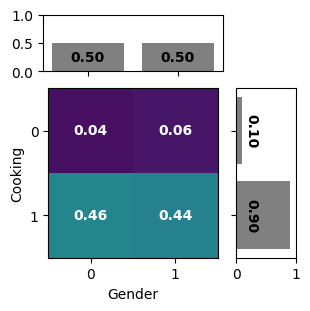

In [9]:
## Plot population distribution
homomul_viz.fig_2bin_comp_pop_frac(comp_pop_frac_tnsr)
plt.ylabel("Cooking")
plt.xlabel("Gender")
plt.show()

### Interaction preferences

#### One-dimensional homophily / heterophily matrices

In [10]:
## One-dimensional matrices of connection preference
h=0.9
h1 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h2 = np.array(
    [[h,1-h],
     [1-h,h]]
    )
h_mtrx_lst = np.array([h1,h2])

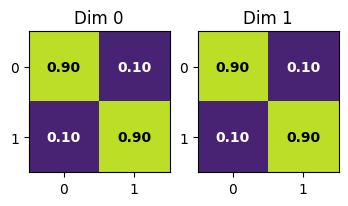

In [11]:
## Plot homophily / heterophily 1D matrices
plt.figure(figsize=(4,2))
ax = plt.subplot(1,2,1)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[0],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 0")
ax = plt.subplot(1,2,2)
homomul_viz.fig_colored_matrix(
	h_mtrx_lst[1],
	ax=ax,
	xticks=[0,1],
	yticks=[0,1],
	show_colorbar=False,
	figsize=None,
	vmin=0,
	vmax=1
	)
plt.title("Dim 1")
plt.show()

#### Aggregation type

In [12]:
kind = "all"
## all -> Attempt connection in every dimension. All attempts must be successful.
## any -> Attempt connection in every dimension. At least one attempt must be successful.
## one -> Attempt connection in one random dimension. The probability of choosing each dimension is given by inpyt array p_d
## max -> Attempt connection in dimension with highest homophily with probability alpha. With probability 1-alpha, random dimension.
## min -> Attempt connection in dimension with lowest homophily with probability alpha. With probability 1-alpha, random dimension.

## Generate network

### Erdos-Renyi style

In [13]:
G_ER = homomul.am_v3(
            h_mtrx_lst,
            comp_pop_frac_tnsr,
            kind=kind,
            directed=True,
            pop_fracs_lst = pop_fracs_lst,
            N=N,
            v = 1, ## Verbosity
            ## Interaction-specific params
            alpha = None,
            p_d = None
            )

100%|██████████| 1000/1000 [00:20<00:00, 48.21it/s]


In [14]:
pprint(dict(G_ER.nodes(data=True)))

{0: {'attr': (1, 0)},
 1: {'attr': (1, 0)},
 2: {'attr': (1, 1)},
 3: {'attr': (1, 1)},
 4: {'attr': (0, 0)},
 5: {'attr': (1, 1)},
 6: {'attr': (1, 1)},
 7: {'attr': (1, 1)},
 8: {'attr': (1, 0)},
 9: {'attr': (1, 0)},
 10: {'attr': (1, 0)},
 11: {'attr': (1, 1)},
 12: {'attr': (1, 0)},
 13: {'attr': (1, 1)},
 14: {'attr': (1, 1)},
 15: {'attr': (0, 0)},
 16: {'attr': (1, 1)},
 17: {'attr': (1, 0)},
 18: {'attr': (0, 1)},
 19: {'attr': (1, 0)},
 20: {'attr': (1, 1)},
 21: {'attr': (1, 0)},
 22: {'attr': (1, 1)},
 23: {'attr': (1, 1)},
 24: {'attr': (1, 0)},
 25: {'attr': (1, 0)},
 26: {'attr': (0, 1)},
 27: {'attr': (1, 0)},
 28: {'attr': (1, 0)},
 29: {'attr': (1, 1)},
 30: {'attr': (1, 1)},
 31: {'attr': (1, 0)},
 32: {'attr': (1, 0)},
 33: {'attr': (1, 0)},
 34: {'attr': (1, 0)},
 35: {'attr': (1, 1)},
 36: {'attr': (1, 0)},
 37: {'attr': (1, 1)},
 38: {'attr': (1, 1)},
 39: {'attr': (1, 0)},
 40: {'attr': (1, 1)},
 41: {'attr': (1, 1)},
 42: {'attr': (1, 1)},
 43: {'attr': (1, 1)}

In [15]:
pprint(list(G_ER.edges()))

[(0, 0),
 (0, 1),
 (0, 8),
 (0, 10),
 (0, 12),
 (0, 17),
 (0, 19),
 (0, 24),
 (0, 25),
 (0, 27),
 (0, 28),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 36),
 (0, 39),
 (0, 46),
 (0, 48),
 (0, 50),
 (0, 51),
 (0, 54),
 (0, 56),
 (0, 57),
 (0, 59),
 (0, 60),
 (0, 63),
 (0, 64),
 (0, 66),
 (0, 72),
 (0, 74),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 88),
 (0, 89),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (0, 99),
 (0, 102),
 (0, 105),
 (0, 108),
 (0, 113),
 (0, 116),
 (0, 118),
 (0, 122),
 (0, 123),
 (0, 127),
 (0, 129),
 (0, 132),
 (0, 135),
 (0, 136),
 (0, 140),
 (0, 144),
 (0, 146),
 (0, 150),
 (0, 152),
 (0, 153),
 (0, 156),
 (0, 160),
 (0, 162),
 (0, 163),
 (0, 165),
 (0, 167),
 (0, 169),
 (0, 173),
 (0, 174),
 (0, 177),
 (0, 178),
 (0, 182),
 (0, 183),
 (0, 184),
 (0, 192),
 (0, 194),
 (0, 200),
 (0, 201),
 (0, 203),
 (0, 206),
 (0, 208),
 (0, 209),
 (0, 214),
 (0, 218),
 (0, 219),
 (0, 221),
 (0, 222),
 (0, 226),
 (0, 227),
 (0, 228),
 (0, 234),
 (0, 237),
 (0, 238),
 (0, 240),


In [16]:
## Export the network in gexf format to visualize it with gephi: https://gephi.org/
G_out = homomul.G_attr_to_str(G_ER,"attr")
nx.write_gexf(G_out, "../partial_results/tests/ER_nw.gexf")

FileNotFoundError: [Errno 2] No such file or directory: '../partial_results/tests/ER_nw.gexf'